In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import linear_model from sklearn for to compare our predictions
from sklearn import linear_model

In [2]:
# Create dataframe using pandas readcsv method
df = pd.read_csv("Data.csv")
df

,Area,Price
0,1200,328000
1,2400,830000
2,600,190000
3,1800,589000
4,3000,920000


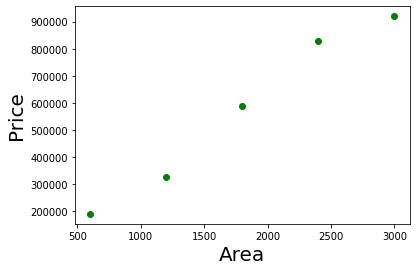

In [3]:
# Let us assume that price of 1200 sq-ft area in hyderabad is 3,28,000 INR and respectively..
# First let's analyse the data using graphs
# Setting x,y labels to a graph

plt.xlabel("Area",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.scatter(df.Area,df.Price,color="green")

In [4]:
# From graph we see that data is linearly distributed
# Let's find some statistical values from data


AreaMean = df["Area"].mean()
PriceMean = df["Price"].mean()

# Distance from Area point to the AreaMean (Area-AreaMean)
df["x1"] = df["Area"]-AreaMean
 
# Distance from Price point to the PriceMean (Price-PriceMean)
df["y1"] = df["Price"]-PriceMean

# Squre of x1
df["Square(x1)"] = df["x1"]*df["x1"]

# Product of x1 and y1
df["x1*y1"] = df["x1"]*df["y1"]
df

,Area,Price,x1,y1,Square(x1),x1*y1
0,1200,328000,-600.0,-243400.0,360000.0,146040000.0
1,2400,830000,600.0,258600.0,360000.0,155160000.0
2,600,190000,-1200.0,-381400.0,1440000.0,457680000.0
3,1800,589000,0.0,17600.0,0.0,0.0
4,3000,920000,1200.0,348600.0,1440000.0,418320000.0


In [6]:
# Sum of data in column x1*y1

SumOfx1_y1 = df["x1*y1"].sum()

# Sum of data in Squre(x1) column

SumOfSquareOfx1 = df["Square(x1)"].sum()

In [7]:
# From y=mx+c we know that
# m = SumOfx1_y1 / SumOfSquareOfx1

Coefficient = SumOfx1_y1/SumOfSquareOfx1

# From y=mx+c (equation of a straight line)
# Where m is a slope or gradiant and c is y-intercept
# As We know regression line goes through the mean of the independent and mean of dependent variable.
# Here the dependent variable is Area and dependent variable is Price

Intercept = PriceMean-Coefficient*AreaMean

print(Coefficient,Intercept)

327.0 -17200.0


In [8]:
# Now we can make python definition that predicts price of given area

def PredictPrice(Area):
    assert type(Area)==int or type(Area)==float ,f"type fo Area{Area} must be int or float"
    return Coefficient*Area+Intercept

print(PredictPrice(200))
print(PredictPrice(4532))
print(PredictPrice(8793))

48200.0
1464764.0
2858111.0


In [9]:
# let us compare our results with linear_model in sklearn

# Creating instance of regression
Regression=linear_model.LinearRegression()

# Fitting Data
Regression.fit(df[["Area"]],df.Price)

# Predicting price
print(Regression.predict([[200]]))
print(Regression.predict([[4532]]))
print(Regression.predict([[8793]]))

[48200.]
[1464764.]
[2858111.]


C:\Users\Harish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Harish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


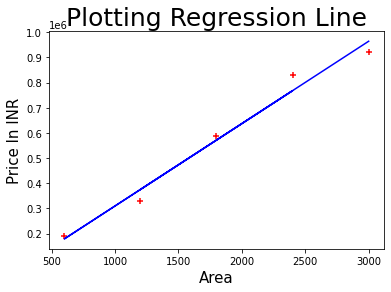

In [10]:
# Plotting Regression line using matplotlib library
plt.xlabel("Area",fontsize=15)
plt.ylabel("Price In INR",fontsize=15)
plt.title("Plotting Regression Line",fontsize=25)
plt.scatter(df.Area,df.Price,color="red",marker="+")
plt.plot(df.Area,Regression.predict(df[["Area"]]),color="blue")